In [5]:
import torch
import torch.nn as nn
from pathlib import Path
import os, sys
# Add parent directory to Python path for imports
notebook_dir = Path().absolute()
sys.path.append(str(notebook_dir.parent))

from networks import Transformer
from runners import Runner
from utils import get_batch

import matplotlib.pyplot as plt

if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

# device = "cpu"
print(f"Using device: {device}")

%load_ext autoreload
%autoreload 2

Using device: mps
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
def load_shakespeare():
    with open("shakespeare.txt", "r", encoding="utf-8") as f:
        text = f.read()

    chars = sorted(list(set(text)))
    vocab_size = len(chars)

    char_to_index = {ch: i for i, ch in enumerate(chars)}
    index_to_char = {i: ch for i, ch in enumerate(chars)}
    def encode(s): return [char_to_index[c] for c in s]
    def decode(l): return "".join([index_to_char[i] for i in l])
    return text, vocab_size, encode, decode

text, vocab_size, encode, decode = load_shakespeare()
data = torch.tensor(encode(text))
n = int(0.9 * len(data))
train_data, val_data = data[:n], data[n:]
block_size = 50
batch_size = 64

x, y = get_batch(train_data, block_size, batch_size)


In [10]:
x, y = get_batch(train_data, block_size, batch_size)
print("INPUT\n", "="*100, "\n", decode(x[1].tolist()))
print("OUTPUT\n", "="*100, "\n", decode(y[1].tolist()))

INPUT
 vilely.
Fare thee well. Thou art a piece of virtue
OUTPUT
 ilely.
Fare thee well. Thou art a piece of virtue,


In [23]:
iters = 1000
net = Transformer(vocab_size, embedding_size = 32, num_heads = 3, num_layers = 1, block_size = 50, dropout=0.1).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(net.parameters(), lr=1e-3)
runner = Runner(net, loss_fn, optimizer, device, metric_freq = 100)
runner.train(train_data, val_data, batch_size = 500, iters = 5000)

Iteration 0, Loss: 4.784071445465088, Accuracy: 0.009999999776482582
Validation Loss: 4.7718305587768555, Validation Accuracy: 0.01119999960064888
Iteration 100, Loss: 3.1604883670806885, Accuracy: 0.19723999500274658
Validation Loss: 3.1052141189575195, Validation Accuracy: 0.19580000638961792
Iteration 200, Loss: 2.8033108711242676, Accuracy: 0.2396399974822998
Validation Loss: 2.8178718090057373, Validation Accuracy: 0.23691999912261963
Iteration 300, Loss: 2.1886425018310547, Accuracy: 0.42500001192092896
Validation Loss: 2.1580569744110107, Validation Accuracy: 0.43595999479293823
Iteration 400, Loss: 0.49817565083503723, Accuracy: 0.9031999707221985
Validation Loss: 0.47665607929229736, Validation Accuracy: 0.9137600064277649
Iteration 500, Loss: 0.2072170525789261, Accuracy: 0.9616000056266785
Validation Loss: 0.2029348611831665, Validation Accuracy: 0.9650400280952454
Iteration 600, Loss: 0.12530317902565002, Accuracy: 0.9758399724960327
Validation Loss: 0.13649068772792816, Va

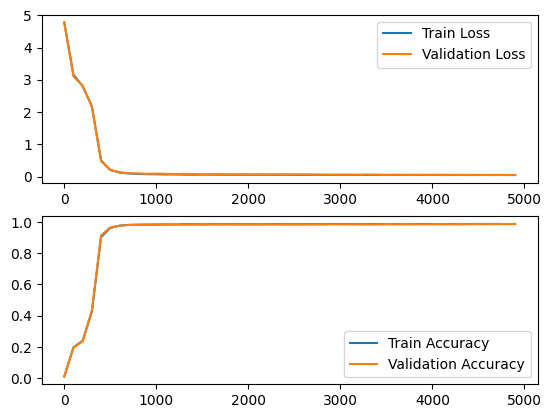

In [24]:
runner.plot_metrics()

In [25]:
string_input = "\nOMELETTE\n To fry, or not to fry?"
predict = runner.generate(string_input, encode, decode, max_new_tokens = 500)
print("\033[94mInput:\033[0m \033[94m" + string_input + "\033[0m")
print("\033[92mOutput:\033[0m ", predict)

Input: 
OMELETTE
 To fry, or not to fry?
Output:  I
Shiv, Rak Hen he and, my antton.
Mw ny printh Shis riveven le mhemiss havturs,
Ant castant vo bloverid. had grit ir weadsedem go meth latheve ome
Bres thate hadler, our of andold st a lageppe;

ROOOSI. I.
Why lf ofst .
Thow, Gofp yors,
ZTHRRT.
Tooo th,
Fy Ws I F Gair;
So ’s of facath cicexad’s.
Idth ur.
Wimy abe siodner be, cill, Sy ipy lame hicy mamy afe latesy aw is mads mave veagf hacnet mar .
Tr mhiystete.
Is.
Ty loke ho
Cs haesow emev bo, Nhic thandenced, ming goen fancrand rourenthe sold
